# Linear Regression - Table of Contents
- [Linear Regression Intro](#linear-regression-intro)
- [Simple Linear Regression model - overview](#simple-linear-regression-model---overview)
- [Simple Linear Regression - Details](#simple-linear-regression---details)
- [Linear Algebra Approach to Linear Regression](#linear-algebra-approach-to-linear-regression)
- [Summary](#summary)
- [How accurate are the coefficient estimates?](#how-accurate-are-the-coefficient-estimates?)
- [Quantifying the Accuracy of the Coefficients](#quantifying-the-accuracy-of-the-coefficients)
    - [Points of observation about the measures of accuracy](#points-of-observation-about-the-measures-of-accuracy)
    - [Confidence Intervals](#confidence-intervals)
    - [Standard Error and Confidence Intervals in Python](#standard-error-and-confidence-intervals-in-python)
    - [Hypothesis Testing](#hypothesis-testing)
    - [Hypothesis Tests for $\beta_{0}$ and $\beta_{1}$ in Python](#hypothesis-tests-for-$\beta_{0}$-and-$\beta_{1}$-in-python)
- [Some preliminary matrix algebra to derive the standard error](#some-preliminary-matrix-algebra-to-derive-the-standard-error)
    - [Random vectors and the variance covariance matrix](#random-vectors-and-the-variance-covariance-matrix)
    - [Computing the standard error terms](#computing-the-standard-error-terms)
    - [Standard Error](#standard-error)
- [Doing it all with a Python package.](#doing-it-all-with-a-python-package)

# Linear Regression Intro
Goal is to predict the value of a dependent (target) variable based on independent (predictor) variables. Linear regression model looks like this:

$$ \hat y = \hat w_{0} + \hat w_{1}x_{1} + \hat w_{2}x_{2} + ... + \hat w_{m}x_{m} $$

where the coefficients $\hat w_{0}$ is the bias and $\hat w_{1}, \hat w_{2} ..., \hat w_{m}$ are the estimated weights.

# Simple linear regression model - overview

Given data $x$ and $y$, we can plot a scatter chart such as for the following small dataset where $x$ is the year and $y$ is the revenue of a company:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = [
    {'X': 2018, 'Y': 50},
    {'X': 2019, 'Y': 54},
    {'X': 2020, 'Y': 58},
    {'X': 2021, 'Y': 55},
    {'X': 2022, 'Y': 60},
]

df = pd.DataFrame(data)
print(df)

      X   Y
0  2018  50
1  2019  54
2  2020  58
3  2021  55
4  2022  60


![alt text](images/5.3%20Linear%20Regression.png 'Linear Regression')

The image above shows that the true value for $y$ under the assumptions of a linear relationship and the estimated value $\hat y$ are often different due to noise in the data, i.e., there will be a random error term $\epsilon$ such that:

$$y = w_{0} + w_{1}x + \epsilon$$

where the bias $w_{0}$ is the intercept and $w_{1}$ is the model slope. In a linear regression model, the best model is one that minimizes the error term values for each data point. So, we wish to find the coefficients which minimize this error. We can use the least squares method to do this.

Given $y_{i} = w_{0} + w_{1}x_{i} +\epsilon , i = 1 ... n$
$$\sum_{i=1}^{n}\epsilon^{2} = \sum_{i=1}^{n}(y_{i} - w_{0} - w_{1}x_{i})^{2}$$

and we can calculate the following:

$$\frac{\partial}{\partial w_{0}} \sum_{i=1}^{n}\epsilon^{2} = 0$$
and
$$\frac{\partial}{\partial w_{1}} \sum_{i=1}^{n}\epsilon^{2} = 0$$

Doing a whole bunch of tedious maths on these two terms leads to the following results:

$$w_{0} = \frac{1}{n}\sum_{i=1}^{n}y_{i} - w_{1}\frac{1}{n}\sum_{1=2}^{n}x_{i}$$
and
$$w_{1} = \frac{\sum_{i=1}^{n}y_{i}x_{i} - \frac{(\sum_{i=1}^{n}y_{i})(\sum_{i=1}^{n}x_{i})}{n} }{\sum_{i=1}^{n}x_{i}^{2} - \frac{(\sum_{i=1}^{n}x_i)^{2}}{n}}$$

Calculating each term individually is simple using the dataframe from earlier.

In [5]:
df['YX'] = df['Y']*df['X']
df['X2'] = df['X']*df['X']
print(df)

      X   Y      YX       X2
0  2018  50  100900  4072324
1  2019  54  109026  4076361
2  2020  58  117160  4080400
3  2021  55  111155  4084441
4  2022  60  121320  4088484


In [13]:
sum_yx = sum(df['YX'])
sumy_sumx = sum(df['X'])*sum(df['Y'])
sum_x2 = sum(df['X2'])
sum_x_2 = (sum(df['X']))*(sum(df['X']))

w1 = (sum_yx - (sumy_sumx / len(df.index))) / (sum_x2 - (sum_x_2 / len(df.index)))
print(w1)

2.1


In [14]:
w0 = sum(df['Y']) / (len(df.index)) - (w1/len(df.index))*sum(df['X'])
print(w0)

-4186.6


This means that we now have a linear equation as follows:

$\hat y = -4186.6 + 2.1\cdot x$

So, in 2024, the predicted revenue is 78.5 million dollars.
Of course, we also need to assess the performance and reliability of the linear regression model on unseen data using model validation techniques. It is possible to gain confidence in the ability to make accurate predictions.

## Simple Linear Regression - Details

Predict a quantitative response $Y$ on the basis of a single predictor $X$. Assume a linear relationship, written as:

$$ Y \approx \beta_{0} + \beta_{1}X $$

For example

$$ sales \approx \beta_{0} + \beta_{1} \times TV $$

can be used to regress TV advertising on sales of a product and see the relationship between them.

However, we can only estimate the true values, so we write

$$ \hat{y} = \hat{\beta_{0}} + \hat{\beta_{1}}x $$

where $\hat{y}$ is a prediction of $Y$ on the basis that $X=x$. The true values of $\beta_{0}$ and $\beta_{1}$ are unknown, so we estimate them under the condition that we want the above equation to be as close as possible to the true values. This closeness can be measured with the least squares approach.

If our linear model is $ \hat{y} = \hat{\beta_{0}} + \hat{\beta_{1}}x $ then we have **residuals** for each data point given by

$$ e_{i} = y_{i} - \hat{y_{i}} $$

which is the difference between the observed value of the dependent variable and the value of the dependent variable predicted by the model. We can then define a residual sum of squares as:

$$ RSS = e_{1}^{2} + e_{2}^{2} + ... e_{n}^{2} $$

or

$$ RSS = (y_{1} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{1})^{2} + (y_{2} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{2})^{2} + ... + (y_{n} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{n})^{2} $$

Minimizing this with calculus, we find:

$$\hat{\beta_{1}} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n}(x_{i} - \bar{x})^2} $$
and
$$ \hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}}\bar{x} $$

Let's take a look at the advertising and sales data below:

In [6]:
import pandas as pd
df = pd.read_csv('Data/advertising.csv')
print(df.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['TV']] # Note that X is 2D
y = df['sales']

model = LinearRegression()
model.fit(X, y)
print(f"Intercept (beta0): {model.intercept_}")
print(f"Slope (beta1): {model.coef_[0]}")

# Predict sales based on the model
df['predicted_sales'] = model.predict(X)

Intercept (beta0): 7.032593549127689
Slope (beta1): 0.047536640433019785


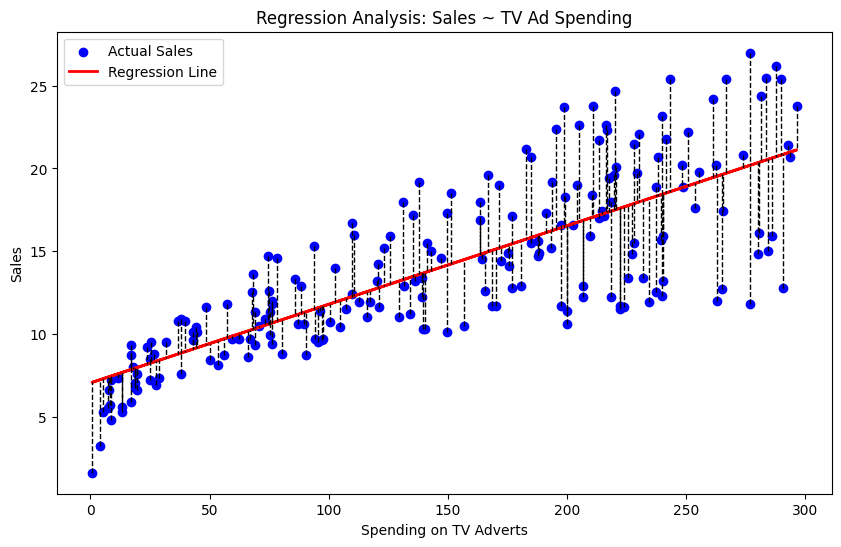

In [11]:
# Plot the regression line and the residuals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['TV'], df['sales'], color='blue', label='Actual Sales')
plt.plot(df['TV'], df['predicted_sales'], color='red', linewidth=2, label='Regression Line')

# For adding lines to represent residuals
for i in range(len(df)):
    plt.plot([df['TV'][i], df['TV'][i]], [df['sales'][i], df['predicted_sales'][i]], 'k--', lw=1)

plt.xlabel('Spending on TV Adverts')
plt.ylabel('Sales')
plt.title('Regression Analysis: Sales ~ TV Ad Spending')
plt.legend()
plt.show()

**No package** Having used a package to do the regression, let us now calculate the coefficients without the help of a package to demonstrate how it is done. To calculate the coefficients we essentially need to program the following:

$$\hat{\beta_{1}} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n}(x_{i} - \bar{x})^2} $$
and
$$ \hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}}\bar{x} $$

In [14]:
df2 = pd.read_csv('Data/advertising.csv')

# Step 1: Calculate the means of TV and sales
x_mean = df['TV'].mean()
y_mean = df['sales'].mean()

# Step 2: Calculate beta1 (slope)
numerator = ((df['TV'] - x_mean) * (df['sales'] - y_mean)).sum()
denominator = ((df['TV'] - x_mean) ** 2).sum()
beta1 = numerator / denominator

# Step 3: Calculate beta0 (intercept)
beta0 = y_mean - beta1 * x_mean

print(f"Calculated Slope (beta1): {beta1}")
print(f"Calculated Intercept (beta0): {beta0}")

Calculated Slope (beta1): 0.047536640433019736
Calculated Intercept (beta0): 7.0325935491276965


## Linear Algebra Approach to Linear Regression

Some calculations may be made easier by taking a linear algebra approach to dealing with the data. In general, if we have a lot of data, we can approximate $Y$ as a linear function of $X$ like so

$$h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}$$
where $\theta_{i}$'s are the weights or parameters ($\beta$'s earlier) and $h(x)$ is the predicted value of $y$. If we let $x_{0} = 1$ be the intercept term, then we can write this as a matrix transformation:

$$h(x) = \sum_{i=0}^{n}\theta_{i}x_{i} = \theta^{T}x$$

Now we can define a **cost function** which is essentially our residual sum of squares from earlier:

$$J(\theta) = \frac{1}{2}\sum_{i=1}^{n}(h_{\theta}(x^{(i)}) - y^{(i)})^{2}$$

where the superscript $i$ represents the $i$ th data point. We want to write this cost function in terms of matrices and vectors.



But first, let's look at these equations in more detail to see precisely what is going on because they are a little opaque as they stand.

Imagine we have three data points in the following table
| | $x_{0}$ | $x_{1}$ | $x_{2}$ |
|---|---|---|---|
| $h(x^{(1)})$ | $x_{0}^{(1)}$ | $x_{1}^{(1)}$ | $x_{2}^{(1)}$ |
| $h(x^{(2)})$ | $x_{0}^{(2)}$ | $x_{1}^{(2)}$ | $x_{2}^{(2)}$ |
| $h(x^{(3)})$ | $x_{0}^{(3)}$ | $x_{1}^{(3)}$ | $x_{2}^{(3)}$ |

The superscripts refer to the data points and the subscripts the independent variables, while $h$ is the prediction of $Y$ based on the model.

We can see that $h(x^{(1)}) = \theta_{0}x_{0}^{(1)} + \theta_{1}x_{1}^{(1)} + \theta_{2}x_{2}^{(1)}$, remembering that $x_{0}=1$ so that $\theta_{0}$ is the intercept. This can be written as:

$$h(x^{(1)}) = \begin{pmatrix} \theta_{0} \theta_{1} \theta_{2} \end{pmatrix} \begin{pmatrix} x_{0}^{(1)} \\ x_{1}^{(1)} \\ x_{1}^{(1)} \end{pmatrix} = \theta^{T} \vec{x^{(1)}}$$

where we have used the convention that horizontal vectors are the vectors transposed.


Using this convention, we can also create a *design matrix* X as follows for n data points, i.e., n-rows of data:

$$X = \begin{pmatrix} -(x^{(1)})^{T}- \\ -(x^{(2)})^{T}- \\ \vdots  \\ -(x^{(n)})^{T}- \end{pmatrix}$$

and let $\hat{y}$ be the $n$-dimensional vector containing all the observed values:

$$\hat{y} = \begin{pmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(n)} \end{pmatrix} $$

Looking back at our three data points as a specific example from earlier, we can relate $X$ and $h(x)$ like so:

$$\begin{pmatrix} h(x^{(1)}) \\ h(x^{(2)}) \\ h(x^{(3)}) \end{pmatrix} = \begin{pmatrix} x_{0}^{(1)} x_{1}^{(1)} x_{2}^{(1)} \\ x_{0}^{(2)} x_{1}^{(2)} x_{2}^{(2)} \\ x_{0}^{(3)} x_{1}^{(3)} x_{2}^{(3)} \end{pmatrix} \begin{pmatrix} \theta_{0} \\ \theta_{1} \\ \theta_{2} \end{pmatrix} $$

which is essentially like writing

$$h(x) = X^{T}\theta$$
notice that the $\theta$ and the $x$ are switched around here.

Now we can focus on the linear algebra more concretely and less opaquely.

Let's write the following for n data points:

$$X\theta - \vec{y} = \begin{pmatrix} (x^{(1)})^T\theta \\ \vdots \\ (x^{(n)})^T\theta \end{pmatrix} - \begin{pmatrix} y^{(1)} \\ \vdots \\ y^{(n)} \end{pmatrix}$$

If we multiply the left size by $(X\theta - \vec{y})^{T}$, and we use the fact that $z^{T}z = \sum_{i}z_{i}^{2}$, then we find

$$\frac{1}{2}(x\theta - \vec{y})^{T}(x\theta - \vec{y}) = \frac{1}{2}\sum_{i=1}^{n}(h_{\theta}(x^{(i)}) - y^{(i)})^2 = J(\theta)$$

In other words, our cost function is now written in terms of matrices and vectors, allowing us to do a little bit of linear algebra. Since we wish to minimize the cost function (residual sum or squares for linear regression), then we should differentiate with respect to theta. Since this is multivariate we use the nabla operator:

$$\vec\nabla_{\theta}J(\theta) = \frac{1}{2}\vec\nabla_{\theta} (x\theta - \vec{y})^{T}(x\theta - \vec{y})$$

Multiply out the matrices on the right hand side

$$\vec\nabla_{\theta}J(\theta) = \frac{1}{2}\vec\nabla_{\theta} [ (X\theta)^{T}(X\theta) - (X\theta)^{T}\vec{y} - \vec{y}^{T}(X\theta) + \vec{y}^{T}\vec{y} ]$$

The first term on the RHS can be written as $\theta^{T}(X^{T}X)\theta$, and the second term as $\vec{y}^{T}(X\theta)$, giving us:

$$\vec\nabla_{\theta}J(\theta) = \frac{1}{2}\vec\nabla_{\theta} [ \theta^{T}(X^{T}X)\theta - 2\vec{y}^{T}(X\theta) +  \vec{y}^{T}\vec{y}] $$

Now, for the first term on the RHS we can use the fact that, for a symmetric matrix $A$, $\vec{\nabla_{x}}x^{T}Ax = 2Ax$, and for the second term we can use the fact that $\vec{\nabla_{x}}b^{T}x = b$, so we get
$$\vec\nabla_{\theta}J(\theta) = \frac{1}{2} [ 2X^{T}X\theta - 2X^{T}\vec{y}] $$

or
$$\vec\nabla_{\theta}J(\theta) =  X^{T}X\theta - X^{T}\vec{y} $$

In order to minimize the parameters, we should set this differential to zero, namely:
$$X^{T}X\theta = X^{T}\vec{y} $$

and rearranging gives us the **normal equations**
$$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$$

This means that we can now use matrix operations to calculate the coefficients, which we will try here:

In [15]:
import pandas as pd
import numpy as np

# Load in the data
df = pd.read_csv('Data/advertising.csv')

# Step 1: Prepare the data matrix X and vector y
# X should have an intercept (column of ones) and the TV column

X = np.c_[np.ones(df.shape[0]), df['TV']]
y = df['sales'].values

# Step 2: Calculate X^T * X
X_transpose = X.T
X_transpose_X = X_transpose.dot(X)

# Step 3: Calculate (X^T * X)^-1
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# Step 4: Calculate X^T y
X_transpose_y = X_transpose.dot(y)

# Step 5: Calculate the coefficients theta
theta = X_transpose_X_inv.dot(X_transpose_y)

# Output the coefficients
beta0 = theta[0] # intercept
beta1 = theta[1] # slope
print(f"Calculated intercept (beta0): {beta0}")
print(f"Calculated slope (beta1): {beta1}")

Calculated intercept (beta0): 7.032593549127724
Calculated slope (beta1): 0.04753664043301957


## Summary
So far, we have looked at three ways of calculating the coefficients
1. We have used a package in python to do it for us
2. We have used basic calculus in one dimension
3. We have used linear algebra with matrix calculus.

Calculated intercept (beta0): 7.032593549127724

Calculated slope (beta1): 0.04753664043301957

All three methods yielded exactly the same result (because they are all essentially the same method, and likely the package uses matrix calculus), but linear algebra makes the calculations much easier when it comes to multilinear regression later 😀. Seeing how it works under the hood makes it much easier to understand what is going on.

## How accurate are the coefficient estimates?

Remember that these calculations are just estimates. Under assumptions of linearity, the true relationship is $Y = \beta_{0} + \beta_{1} + \epsilon$, which is a **population regression line**. The estimates characterize the **least squares line**. The true relationship is generally not known and not observed in real world data. This is synonymous with statistical approaches in which we sample from a population and are interested in the population mean $\mu$ but must make do with estimating it with the mean of the sample data $\hat{\mu}$.

$\beta_{0}$ is the expected value of $Y$ when $X=0$ and $\beta_{1}$ is the average increase in $Y$ after a one-unit increase in $X$.

In the above approximations, with $\beta_{0} = 7.032593549127724$ and $\beta_{1} = 0.04753664043301957$ we can say that if we spend an extra $1000 on advertising, we will sell an extra 47.5 items

The $\epsilon$ term captures error related to:
- measurement error
- faulty assumptions about linearity
- other missing variables in the model
- we assume $\epsilon$ is independent of X.

We can start to answer the question about accuracy by continuing the parallel with sampling a random variable. If we are interested in the mean of a sample, we can ask how the estimated mean value changes with a different sample set. In taking new samples from the same population, we get new estimates of the mean. All these estimates vary slightly. One estimated mean value may over-estimate the true value, another may under-estimate the true value. But, over a huge number of these observations, the average of all the estimates of the mean should converge towards to the true value of the mean. If the estimated mean values do this, then they each represent an *unbiased estimator* of the true mean, i.e., we say that the estimated mean value is an *unbiased estimator*.

In fact, the estimates of the intercept and slope in simple linear regression are also *unbiased estimators* of the true intercept and slope. In other words, if we took a lot of data and calculated coefficients for all the data sets, the average of the coefficients would converge towards the true values of the coefficients.

Let's simulate this idea with data:

Step 1: Imagine that the true distribution is given by $Y = 2 + 3X + \epsilon$.

Step 2: Let $\epsilon$ be generated from a normal distribution with mean zero.

Step 3: Create 100 random $X$ values and generate 100 corresponding $Y$ values from the true distribution model in step 1.

Step 4: Plot a least squares regression line for this data set.

Step 5: Repeat the above four steps multiple times to show that each time, the regression line will be slightly different.

[1.8369774 3.1605974]
[1.77966925 2.9910002 ]
[2.12209911 2.60862449]
[1.95403834 3.05405501]
[2.41540633 1.93018066]
[2.06809223 2.67003466]
[1.74791472 3.34341645]
[2.37290175 2.3397394 ]
[2.14405705 2.77538422]
[1.83717611 3.10298373]


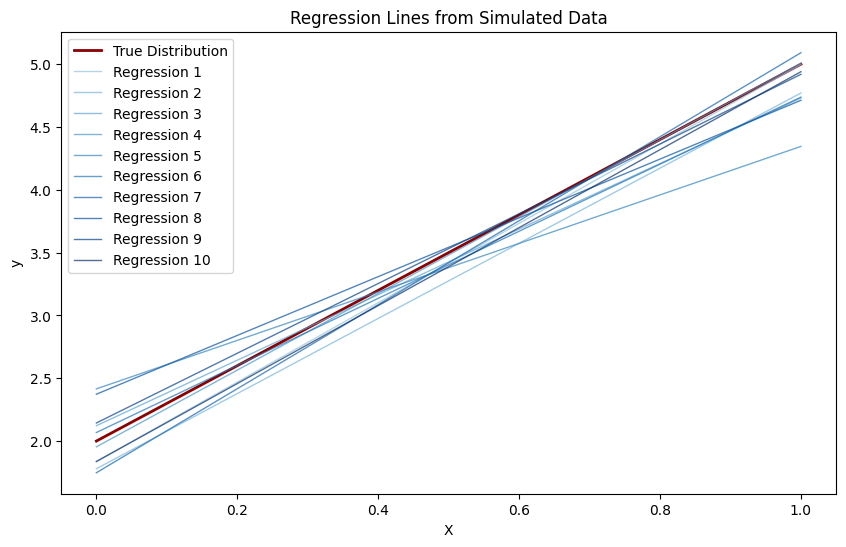

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Function to generate random data
def generate_data(n_points=100):
    X = np.random.uniform(0, 1, n_points) # 100 random values between 0 and 1
    epsilon = np.random.normal(0, 1, n_points) # 100 normal random values, mean 0, std 1
    y = 2 + 3*X + epsilon # True distribution
    return X, y

# Step 2: Regression fitting function taken from matrix calculus approach above
def linear_regression(X, y):
    # Step 2.1: Prepare the design matrix
    # X should have an intercept (column of ones) and the TV column
    X_design = np.c_[np.ones((X.shape[0], 1)), X]

    # Step 2.2: Calculate X^T * X
    X_transpose = X_design.T
    X_transpose_X = X_transpose.dot(X_design)

    # Step 2.3: Calculate (X^T * X)^-1
    X_transpose_X_inv = np.linalg.inv(X_transpose_X)

    # Step 2.4: Calculate X^T y
    X_transpose_y = X_transpose.dot(y)

    # Step 2.5: Calculate the coefficients theta
    theta = X_transpose_X_inv.dot(X_transpose_y)
    return theta

# Step 3: Simulation and plotting
n_simulations = 10
colors = plt.cm.Blues(np.linspace(0.4, 1, n_simulations)) # Different shades of blue

plt.figure(figsize=(10, 6))

# Plot the true regression line in dark red
X_range = np.linspace(0, 1, 100)
true_line = 2 + 3*X_range
plt.plot(X_range, true_line, color="darkred", linewidth=2, label='True Distribution')

# Run the simulations
for i in range(n_simulations):
    X, y = generate_data()
    theta = linear_regression(X, y)
    print(theta)
    beta0, beta1 = theta[0], theta[1]

    # Plotting the fitted regression line
    plt.plot(X_range, beta0 + beta1 * X_range, color=colors[i], linewidth=1, linestyle='-', alpha=0.7, label=f'Regression {i+1}')

# Step 4: Finalize the plot
plt.title('Regression Lines from Simulated Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Summary of Discussion on Accuracy of Coefficients
So, we can see that the coefficients vary depending on the data that we have. Above, data was generated with random noise so that we could simulate retrieving samples from the true population, and linear regression was performed on this data, leading to different values of the coefficients.

### Quantifying the Accuracy of the Coefficients
In general statistics, we quantify the accuracy of the estimated mean with the standard error of the true mean, written:

$$Var(\hat \mu) = SE(\hat \mu)^{2} = \frac{\sigma^{2}}{n}$$

For linear regression, we can find that

$$SE(\hat \beta_{0})^{2} = \sigma^{2}\left(\frac{1}{n} + \frac{\bar{x}^{2}}{\sum_{i=2}^{n}(x_{i} - \bar{x})^{2}}\right)$$

and

$$SE(\hat \beta_{1})^2 = \frac{\sigma^{2}}{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}$$

where $\sigma^{2} = Var(\epsilon)$. To be strictly valid, we must assume that the errors for each observation have a *common variance* and are *uncorrelated*. This is **not** true when we examine the chart above which shows the residuals because the size of the residuals increases as we move along the x-axis.

### Points of observation about the measures of accuracy
- $SE(\beta_{1})^{2}$ gets smaller when $x_{i}$ are more spread out.
- If $\bar{x}$ were zero, then $SE(\beta_{0})^2$ would be the same as $Var(\mu)$
- $\sigma^{2}$ is usually not known, but we estimate it using the residual standard error $RSE$ as follows:

$$RSE = \sqrt{\frac{RSS}{n-2}}$$
where $RSS$ is the residual sum of squares.
- When using $RSE$ to estimate $SE$ we should strictly write $\hat{SE}$ to indicate an estimation of the true value.

### Confidence Intervals
We can use the standard errors of the coefficients to calculate their confidence intervals. A $95%$ confidence interval implies if we take many samples and construct the confidence interval for each sample, then $95%$ of all intervals will contain the true value of the parameter.

$$CI_{.95} = \hat{\beta} \pm 2SE(\hat{\beta})$$
or
$$\left[ \hat{\beta} - 2SE(\hat{\beta}), \hat{\beta} + 2SE(\hat{\beta})  \right]$$

### Standard Error and Confidence Intervals in Python
We will calculate these standard errors and confidence intervals in Python next.
- Use our function for linear regression to calculate the coefficients again.
- Write a function that then calculates the residual sum of squares $RSS$
- Calculate the residual square error $RSE$
- Calculate the confidence intervals

In [83]:
# Ensure our original dataset is still available
# print(df.head())

# Get the data out
X, y = df['TV'], df['sales']


# Call our linear regression function
coefs = linear_regression(X, y)
print("beta0: ", coefs[0])
print("beta1: ", coefs[1])

# Write the function for RSS and RSE
def RSS_RSE_Calc(X, y, coefs):
    y_hat = [];
    numDataPoints = len(X)
    RSS = 0;
    # Calculate the predicted values based on the coefficients in the mode
    for i in range(numDataPoints):
        y_hat_val = coefs[1]*X[i] + coefs[0]
        y_hat.append(y_hat_val);
    
    # Combine the series into a dataframe
    y_hat = pd.Series(y_hat)
    newDF = pd.concat([X, y_hat, y], axis=1)
    newDF.columns = ['X', 'y_hat', 'y']

    # Calculate RSS and RSE
    newDF['Residual_Square'] = (newDF['y'] - newDF['y_hat'])**2
    RSS = sum(newDF['Residual_Square']);
    RSE = np.sqrt(RSS/(numDataPoints-2))

    return RSS, RSE

# Call the RSS_RSE_Calc function
RSS, RSE= RSS_RSE_Calc(X, y, coefs)

# Now calculate the standard errors for the coefficients
def standard_errors(X, RSE):
    newDF = pd.DataFrame({
        'X': X
    })
    x_bar = newDF['X'].mean()
    newDF['x_xbar_sq'] = (newDF['X'] - x_bar)**2
    sum_x_xbar_sq = newDF['x_xbar_sq'].sum()
    SE_beta0 = (RSE**2) * ((1/newDF.shape[0]) + ((x_bar**2) / sum_x_xbar_sq))
    SE_beta1 = (RSE**2) / sum_x_xbar_sq
    return np.sqrt(SE_beta0), np.sqrt(SE_beta1)

# Call the standard_errors function
SE_beta0, SE_beta1 = standard_errors(X, RSE)
print("Standard error for beta0: ", SE_beta0)
print("Standard error for beta1: ", SE_beta1)

# Calculate the confidence intervals and generate a report
def get_conf_ints(SE_beta0, SE_beta1, coefs):
    lower_beta0 = coefs[0] - 2 * np.sqrt(SE_beta0)
    upper_beta0 = coefs[0] + 2 * np.sqrt(SE_beta0)
    lower_beta1 = coefs[1] - 2 * np.sqrt(SE_beta1)
    upper_beta1 = coefs[1] + 2 * np.sqrt(SE_beta1)
    reports = f"For beta0, the intercept, CI_95% = [{lower_beta0}, {upper_beta0}]. \nFor beta1, the slope, CI_95% = [{lower_beta1}, {upper_beta1}]."
    return reports
CI_report = get_conf_ints(SE_beta0, SE_beta1, coefs)
print(CI_report)

beta0:  7.032593549127724
beta1:  0.04753664043301957
Standard error for beta0:  0.4578429402734785
Standard error for beta1:  0.0026906071877968707
For beta0, the intercept, CI_95% = [5.679311700770215, 8.385875397485233]. 
For beta1, the slope, CI_95% = [-0.05620548577994891, 0.15127876664598805].


### Hypothesis Testing
Hypothesis Testing on the coefficients looks like this:

$H_{0}$: There is no relationships between $X$ and $Y$, which would look like this:

$$ H_{0} : \beta_{1} = 0 $$
which corresponds to there being no slope and the model reduces to $Y = \beta_{0} + \epsilon$, and

$$ H_{a} : \beta_{1} \ne 0 $$

Therefore, we need to test whether $\beta_{1}$ is sufficiently far from zero. We expect that if there is no relationship between $X$ and $Y$ then the following equation should have a t-distribution with $n-2$ degrees of freedom:

$$ t = \frac{\hat{\beta_{1}} - 0}{SE(\hat{\beta_{1}})} $$

 where t measures the number of standard deviations that the $\beta_{1}$ is from $0$. This impies that if the standard error is large then the coefficient $\beta_{1}$ must be large in absolute value in order to reject the null hypothesis to make sure that t is large. Similarly, if the standard error is small, then even small values of $\beta_{1}$ can ensure that t is large.

 The value of t indicates the probability in the t-distribution of finding the particular $\beta_{1}$, implying that a small p-value indicates a significant result, i.e, the coefficient value is significantly far from zero.

#### Hypothesis Tests for $\beta_{0}$ and $\beta_{1}$ in Python
It is relatively simple to calculate the t-statistics in Python.

In [84]:
from scipy.stats import t

t_beta0 = coefs[0] / SE_beta0
t_beta1 = coefs[1] / SE_beta1
print("t-stat for beta0: ", t_beta0)
print("t-stat for beta1: ", t_beta1)

p_value_beta0 = 2 * (1 - t.cdf(abs(t_beta0), df = df.shape[0]))
p_value_beta1 = 2 * (1 - t.cdf(abs(t_beta1), df = df.shape[0]))
print("p-value for beta0: ", p_value_beta0)
print("p-value for beta1: ", p_value_beta1)

t-stat for beta0:  15.36027517411761
t-stat for beta1:  17.66762560087548
p-value for beta0:  0.0
p-value for beta1:  0.0


The t-stats are both quite large, and the p-values are exceedingly small, so we can assume that these coefficients are significant.

## Some preliminary matrix algebra to derive the standard error
Earlier we saw that
$$\hat{\theta} = (X^{T}X)^{-1}X^{T}\vec{y}$$
which is the vector of coefficients and where here we have added the hat on top to be clear that this is an estimate. We can build on this to derive the values for the standard error. We will do the following:

- Examine the variance-covariance matrix from random vectors
- Show that under a transformation, $Var(A\vec{a}) = A Var(\vec{a}) A^{T}$
- Apply this property to the above estimation for the coefficients to derive the standard error.

### Random vectors and the variance covariance matrix
It is convenient to place random variables together into a vector, $X = [X_{1}, X_{2}, ..., X_{n}]^{T}$, and then this is known as a **random vector**

Given the expectation of a random variable, we can write the expectation of our random vector as:

$$\mathbb{E}[X] = \begin{pmatrix} \mathbb{E}[X_{1}] \\ \mathbb{E}[X_{2}] \\ ... \\ \mathbb{E}[X_{n}] \end{pmatrix}$$

We also know that the covariance of two **random variables** is given by:

$$ Cov[X, Y] = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])] = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y] $$

So, if we have a random vector $X$ (I have chosen not to write the vector sign on top), we can define the **covariance matrix** as follows:

$$ Cov[X] = \mathbb{E}[(X - \mathbb{E}[X])(X - \mathbb{E}[X])^{T}] $$
which we can easily expand out as

$$ Cov[X] = \mathbb{E}\left[ \begin{pmatrix} (X_{1} - \mathbb{E}X_{1})^{2}, (X_{1} - \mathbb{EX_{1}})(X_{2} - \mathbb{E}X_{2}), \dots , (X_{1} - \mathbb{EX_{1}})(X_{n} - \mathbb{E}X_{n}) \\ (X_{1} - \mathbb{E}X_{2})(X_{1} - \mathbb{E}X_{1}), (X_{1} - \mathbb{EX_{2}})^{2}, \dots , (X_{2} - \mathbb{EX_{2}})(X_{n} - \mathbb{E}X_{n}) \\ \vdots \\   (X_{n} - \mathbb{E}X_{n})(X_{1} - \mathbb{E}X_{1}), (X_{n} - \mathbb{EX_{n}})(X_{2} - \mathbb{EX_{2}}), \dots , (X_{2} - \mathbb{EX_{n}})(X_{n} - \mathbb{E}X_{n})   \end{pmatrix} \right] $$

which can be re-written as

$$ Cov[X] = \begin{pmatrix} Var(X_{1}), Cov(X_{1},X_{2}), \dots , Cov(X_{1},X_{n}) \\ Cov(X_{2}, X_{1}), Var(X_{2}) \dots , Var(X_2), X_{n}) \\ \vdots \\   Cov(X_{n},X_{1}), Cov(X_{n},X_{2}) \dots , Var(X_{n})   \end{pmatrix}  $$

and this is known as the variance-covariance matrix.

### Proof that $Var(A\vec{a}) = A Var(\vec{a}) A^{T}$

Given a random vector, which we denote by $\vec{a}$ we can say that its mean is $\mathbb{E}[\vec{a}] = \mu_{\vec{a}}$, and the variance-covariance matrix of $\vec{a}$, $Var(\vec{a})$ is given as:

$$ Var(\vec{a}) = \mathbb{E}[(\vec{a} - \mu_{\vec{a}})(\vec{a} - \mu_{\vec{a}})^{T}] $$

What happens if we make a linear transformation with $A$ of our random vector $A\vec{a}$. Let's follow a few steps:

- Define the mean of the transformed vector
$$\mathbb{E}[A\vec{a}] = A\mathbb{E}[\vec{a}] = A\mu_{\vec{a}}$$
- Now define the deviation from the mean for the transformed vector:
$$ A\vec{a} - \mathbb{E}[A\vec{a}] = A\vec{a} - A\mu_{\vec{a}} = A(\vec{a} - \mu_{\vec{a}})$$
- Next, calculate the variance-covariance matrix of the transformed random vector
$$ Var(A\vec{a}) = \mathbb{E}[(A(\vec{a} - \mu_{\vec{a}})(A(\vec{a} - \mu_{\vec{a}}))^{T})] $$
- Expand the expression:
$$ Var(A\vec{a}) = \mathbb{E}[(A(\vec{a} - \mu_{\vec{a}})(\vec{a} - \mu_{\vec{a}})^{T}A^{T})] $$
- Since the matrices are constant terms, we can move them outside the expectation.
$$ Var(A\vec{a}) = A\mathbb{E}[(\vec{a} - \mu_{\vec{a}})(\vec{a} - \mu_{\vec{a}})^{T}] A^{T}$$
- The expectation is just the variance-covariance matrix from earlier, so
$$ Var(A\vec{a}) = AVar(\vec{a})A^{T}$$

### Computing the standard error terms
Start with our normal equation:
$$\hat{\theta} = (X^{T}X)^{-1}X^{T}\vec{y}$$
and substitute $\vec{y} = X\theta + \vec{\epsilon}$ into the estimator of the normal equation, resulting in:
$$\hat{\theta} = (X^{T}X)^{-1}X^{T}(X\theta + \vec{\epsilon})$$
This simplifies to 
$$\hat{\theta} = (X^{T}X)^{-1}X^{T}X\theta + (X^{T}X)^{-1}X^{T}\vec{\epsilon}$$
which simplifies to
$$\hat{\theta} = \theta + (X^{T}X)^{-1}X^{T}\vec{\epsilon}$$
because $(X^{T}X)^{-1}X^{T}X = I$

Now, let's take the variance of this equation like so:
$$Var(\hat{\theta}) = Var(\theta + (X^{T}X)^{-1}X^{T}\vec{\epsilon})$$

The variation in $\hat{\theta}$ is only due to the noise in the data (the term in the variance of the right hand side) Since the $\theta$ term on the right hand side is the true value, it is a fixed value, i.e., not random, so $Var(\theta)$ is zero. Therefore, we can cancel this term.

Using the result above for a transformation matrix and random vector multiplication:
$$Var(\hat{\theta}) = ((X^{T}X)^{-1}X^{T})Var(\vec{\epsilon})((X^{T}X)^{-1}X^{T})^{T}$$

We can simplify $Var(\vec{\epsilon})$ with $Var(\vec{\epsilon}) = \sigma^{2}I$ where $\sigma^{2}$ is the variance of the error terms, assuming homoscedasticity, i.e, the variance is constant. Therefore,
$$Var(\hat{\theta}) = ((X^{T}X)^{-1}X^{T})\sigma^{2}I((X^{T}X)^{-1}X^{T})^{T}$$
$$Var(\hat{\theta}) = \sigma^{2}((X^{T}X)^{-1}X^{T})I((X^{T}X)^{-1}X^{T})^{T}$$
$$Var(\hat{\theta}) = \sigma^{2}(X^{T}X)^{-1}X^{T}X(X^{T}X)^{-1}$$
Given that $X^{T}X(X^{T}X)^{-1} = I$,
$$Var(\hat{\theta}) = \sigma^{2}(X^{T}X)^{-1}$$

So, we now have a simple way to determine the variance of the coefficient estimates.

### Standard Error
Now that we can calculate the variance of the coefficient estimates, we can get the standard error of each coefficient. It is hte square root of the **diagonal elements** of the variance-covariance matrix $Var(\hat{\theta})$ that we computed above, i.e.,

$$SE(\hat{\theta_{i}}) = \sqrt{\sigma^{2}[(X^{T}X)^{-1}]_{ii}}$$

## Doing it all with a Python package.
Now, let's see if the manual calculations above were correct by using a standard package, here scikit-learn

In [95]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy import stats

# Fit the model

X = df[['TV']]
y = df['sales']
model = LinearRegression().fit(X, y)
intercept = model.intercept_
coefs = model.coef_

# Calculate standard errors
y_pred = model.predict(X)
residuals = y - y_pred
n = len(X) # Number of observations
p = X.shape[1] # Number of predictors
dof = n - p - 1

# Residual sum of squares
RSS = np.sum(residuals**2)

# Standard error of regression
s_squared = RSS / dof

# Standard error of coefficients - using the maths from earlier.
X_with_intercept = np.c_[np.ones(X.shape[0]), X]
cov_matrix = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept)) * s_squared
standard_errors = np.sqrt(np.diagonal(cov_matrix))

# t-stats
t_values = np.array([intercept, *coefs]) / standard_errors

# p-values
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=dof)) for t in t_values]

# Summary table
summary_table = pd.DataFrame({
    'Coefficient': [intercept, *coefs],
    'Std. Error': standard_errors,
    't-statistic': t_values,
    'p-value': p_values
}, index=['Intercept', 'TV'])
print(summary_table)


           Coefficient  Std. Error  t-statistic  p-value
Intercept     7.032594    0.457843    15.360275      0.0
TV            0.047537    0.002691    17.667626      0.0


The values are all the same, implying that the "manual" python code is accurate 😃

In terms of the meaning of the data, we can see that the p-values are practically zero, implying that we can reject the null hypothesis and say that $\beta_{0} \ne 0$ and $\beta_{1} \ne 0$, i.e., we are reasonably confidence that there is a relationship between television advertising and sales.

## Assessing the accuracy of the model
We have rejected the null hypothesis. Next, we should examine the *extent to which the model fits the data*. We can assess this with the residual standard error or the $R^{2}$ statistic.

### Residual Standard Error
Each observation is associated with an error due to noise and other assumptions. This makes perfectly predicting Y from X almost impossible. The Residual Standard Error is an estimate of the standard deviation of the error. We can say that the **residual standard error is the average amount that the response will deviate from the true regression line**.

$$RSE = \sqrt{\frac{1}{n-2} RSS} = \sqrt{\frac{1}{n-2} \sum_{i=1}^{n}(y_{i} - \hat{y_{i}})^{2}}$$

In [98]:
# Calculating RSE from above
RSE = np.sqrt(RSS * (1 / (n-2)))
print(f"The Residual Square Error when regressing TV advertising on sales is: {RSE}")

The Residual Square Error when regressing TV advertising on sales is: 3.2586563686504624


This means that actual sales deviate from the true regression line by approximately 3260 units on average. Points to note
- Even if the coefficients were known exactly, any prediction of sales based on TV advertising would be off by about 3260 units on average.
- Is this acceptable? It depends on the problem context.
- In the advertising data set, the mean value of sales is approximately 14,000 units, to the percentage error is 3260 / 14000 = 23%.

The RSE is like a *lack of fit* of a model to the data.
- Case 1: Predictions using the model are close to true outcomes, i.e., $\hat{y_{i}} \approx y_{i}$ then RSE is small and model fits the data well.
- Case 2: If $\hat{y_{i}}$ are far from $y_{i}$ for one or more observations, the RSE may be quite large and the model might not fit the data so well.

**Issues**
RSE is measured in the units of Y so it's not clear what makes a good value for RSE.

### R-Statistic
- R-statistic is a proportion
- Takes on value between 0 and 1.
- Independent of the scale of Y.

$$ R^{2} = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$$
where $TSS = \sum_{i=1}^{n}(y_{i} - \bar{y})^2$ is the *total sum of squares*.

- TSS measures the total variance in the response Y
- TSS is like the amount of variability inherent in the response **before** the regression is performed.
- RSS is like the amount of variability that is left unexplained **after** performing the regression, since it is the variability in the uncontrollable error.
- Therefore, $TSS-RSS$ is like the amount of variability in the response that is explained (or removed) by performing the regression.
- So $R^{2}$ measures the proportion of variability in Y that can be explained using X.

**So that means...**
- An $R^{2}$ statistic that is close to 1 indicates that a large proportion of the variability in the response is explained by the regression, i.e., RSS is small relative to TSS.
- An $R^{2}$ statistic that is close to 0 implies that the regression does not explain much of the variability, i.e., RSS is about the same as TSS, so variance unexplained is the same as variance before the regression. This implies that either the model is wrong or the error variance is high, or both.

**Good values for $R^{2}$ statistic**
- Depends on the context of the problem.
- e.g., in a true linear problem in physics with small residual error, we would expect $R^{2}$ to be large
- e.g., in biology, psychology or marketing, the linear model is only an approximation, so residual errors are likely to be large, implying $R^{2}$ would be smaller.

**Relationship with correlation**

$$Corr(X, Y) = \frac{ \sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y}) }{ \sqrt{ \sum_{i=1}^{n}(x_{i} - \bar{x})^{2} } \sqrt{ \sum_{i=1}^{n}(y_{i} - \bar{y})^{2}} } $$

In a simple linear regression, $R^{2} = r^{2}$. However in multiple linear regression, this is not true, and $R^{2}$ does a better job of showing the correlation between multiple variables.


## Assessing Model Accuracy
- The MSE (mean square error) is a commonly used measure to determine how close the predicted response is to the true value of a particular observation.
- We can use *training data* to train the MSE.
- We are interested in the accuracy of the predictions made on *untrained or test data*.
- We want to choose a statistical training method that results in the lowest MSE on the test data.

**Statistical training methods**

Imagine that we have a statistical learning method which can be tweaked through some hyperparameter or other, and with each tweak we get a regression that fits the data more and more closely. For each value of the hyperparameter, we can plot MSE of both the training and test sets versus the "flexibility" of the hyperparameter. What we find is that the MSE of the training data continues to fall as we tweak the flexibility/hyperparameter, but on the other hand, the MSE of the test data starts to fall, but at some point it rises again - it forms a u-shape. There is clearly a trade-off here.
- **Overfitting:** we have a small training MSE but large test MSE
- **Underfitting:** we have a large training MSE and a large test MSE

**Bias-Variance Trade-off**

We can decompose the expectation of the MSE at point $x_{0}$ into three parts as follows:

$$\mathbb{E}\left[(y_{0} - \hat{f}(x_{0})^2\right] = Var(\hat{f}(x_{0})) + \left[Bias(\hat{f}(x_{0}))\right]^{2} + Var(\epsilon)$$

This is the average test MSE that we would obtain if we repeatedly estimated $f$ using a large number of training sets and tested each at $x_{0}$ in the test set.

From this equation we see that in order to minimize MSE, we need to simultaneously achieve *low variance* and *low bias*. Both of these terms are non-negative, so the expected test MSE can never lie below $Var(\epsilon)$, the irreducible or uncontrollable error.

- **Variance**: is the amount by which $f$ would change if we estimated it using a different *training* set. Ideally, we do not want too much variance between different training sets. High variance implies large changes in the predicted values from one data set to another. **More flexible statistical methods have higher variance**.
- **Bias**: is the error introduced by approximating a real-life problem with a much simpler model than would actually be required - i.e, we can think of this as *model bias*. If a linear regression model is chosen for a dataset that does not have any linearity, then our estimations will simply never be accurate, i.e, the estimations are biased towards a linear model. **More flexible statistical methods have lower bias**.

So, from the above explanation, we can see why there is a trade-off between variance and bias. We want a training method that results in both low variance and low bias; to achieve this, we have to accept some higher variance over multiple training sets than might be possible as well as some higher bias towards a weaker model than might be possible, i.e., we choose a model that some degree of flexibility, but not too little and not too much - like a Goldilocks just-right spot.